In [59]:
# Custom geographic K-means function
from geo_kmeans import *

# Standard Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [7]:
# Create a Dataframe (data from data.seattle.gov)
df = pd.read_csv("data/seattle_police_911.csv", low_memory=False)

In [9]:
# Check for missing values and miscast data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327132 entries, 0 to 1327131
Data columns (total 19 columns):
CAD CDW ID                     1327132 non-null object
CAD Event Number               1327132 non-null int64
General Offense Number         1327132 non-null int64
Event Clearance Code           1311777 non-null float64
Event Clearance Description    1311775 non-null object
Event Clearance SubGroup       1311775 non-null object
Event Clearance Group          1311775 non-null object
Event Clearance Date           1311565 non-null object
Hundred Block Location         1323644 non-null object
District/Sector                1325865 non-null object
Zone/Beat                      1327130 non-null object
Census Tract                   1324411 non-null float64
Longitude                      1327130 non-null float64
Latitude                       1327130 non-null float64
Incident Location              1327130 non-null object
Initial Type Description       733582 non-null object
Initia

In [10]:
# Examine head of the DataFrame
df.head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,﻿15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,07/17/2010 08:49:00 PM,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,07/17/2010 08:50:00 PM,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN
2,15738,10000246255,2010246255,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",07/17/2010 08:55:00 PM,21XX BLOCK OF 3RD AVE,M,M2,7200.2025,-122.342843,47.613551,"(47.613551471, -122.342843234)",NaN,NaN,NaN,NaN
3,15739,10000246473,2010246473,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,07/17/2010 09:00:00 PM,7XX BLOCK OF ROY ST,D,D1,7200.1002,-122.341847,47.625401,"(47.625401388, -122.341846999)",NaN,NaN,NaN,NaN
4,15740,10000246330,2010246330,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",07/17/2010 09:00:00 PM,9XX BLOCK OF ALOHA ST,D,D1,6700.1009,-122.339709,47.627425,"(47.627424837, -122.339708605)",NaN,NaN,NaN,NaN


In [13]:
# Create new DataFrame containing Latitude and Longitude for simplicity
X = df[['Latitude', 'Longitude']]

In [15]:
# Drop missing values
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327130 entries, 0 to 1327131
Data columns (total 2 columns):
Latitude     1327130 non-null float64
Longitude    1327130 non-null float64
dtypes: float64(2)
memory usage: 30.4 MB


In [52]:
# Call custom geographic K-means function
centroids, clusters = k_means(X, k=6)

In [74]:
# Convert cenroid tuples into DataFrame for easier manipulation
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = ['Latitude', 'Longitude']
centroid_df

,Latitude,Longitude
0,47.609271,-122.328696
1,47.548864,-122.368882
2,47.540793,-122.285555
3,47.664213,-122.311433
4,47.663564,-122.370477
5,47.711535,-122.329316


In [83]:
# Convert actual SPD location tuples into DataFrame 
actual_list = [(47.604319, -122.329338), (47.702901, -122.334762),
              (47.538569, -122.293326), (47.535838, -122.361843),
              (47.614923, -122.317244), (47.616232, -122.336609)]
actual_df = pd.DataFrame(actual_list)
actual_df.columns = ['Latitude', 'Longitude']
actual_df

,Latitude,Longitude
0,47.604319,-122.329338
1,47.702901,-122.334762
2,47.538569,-122.293326
3,47.535838,-122.361843
4,47.614923,-122.317244
5,47.616232,-122.336609


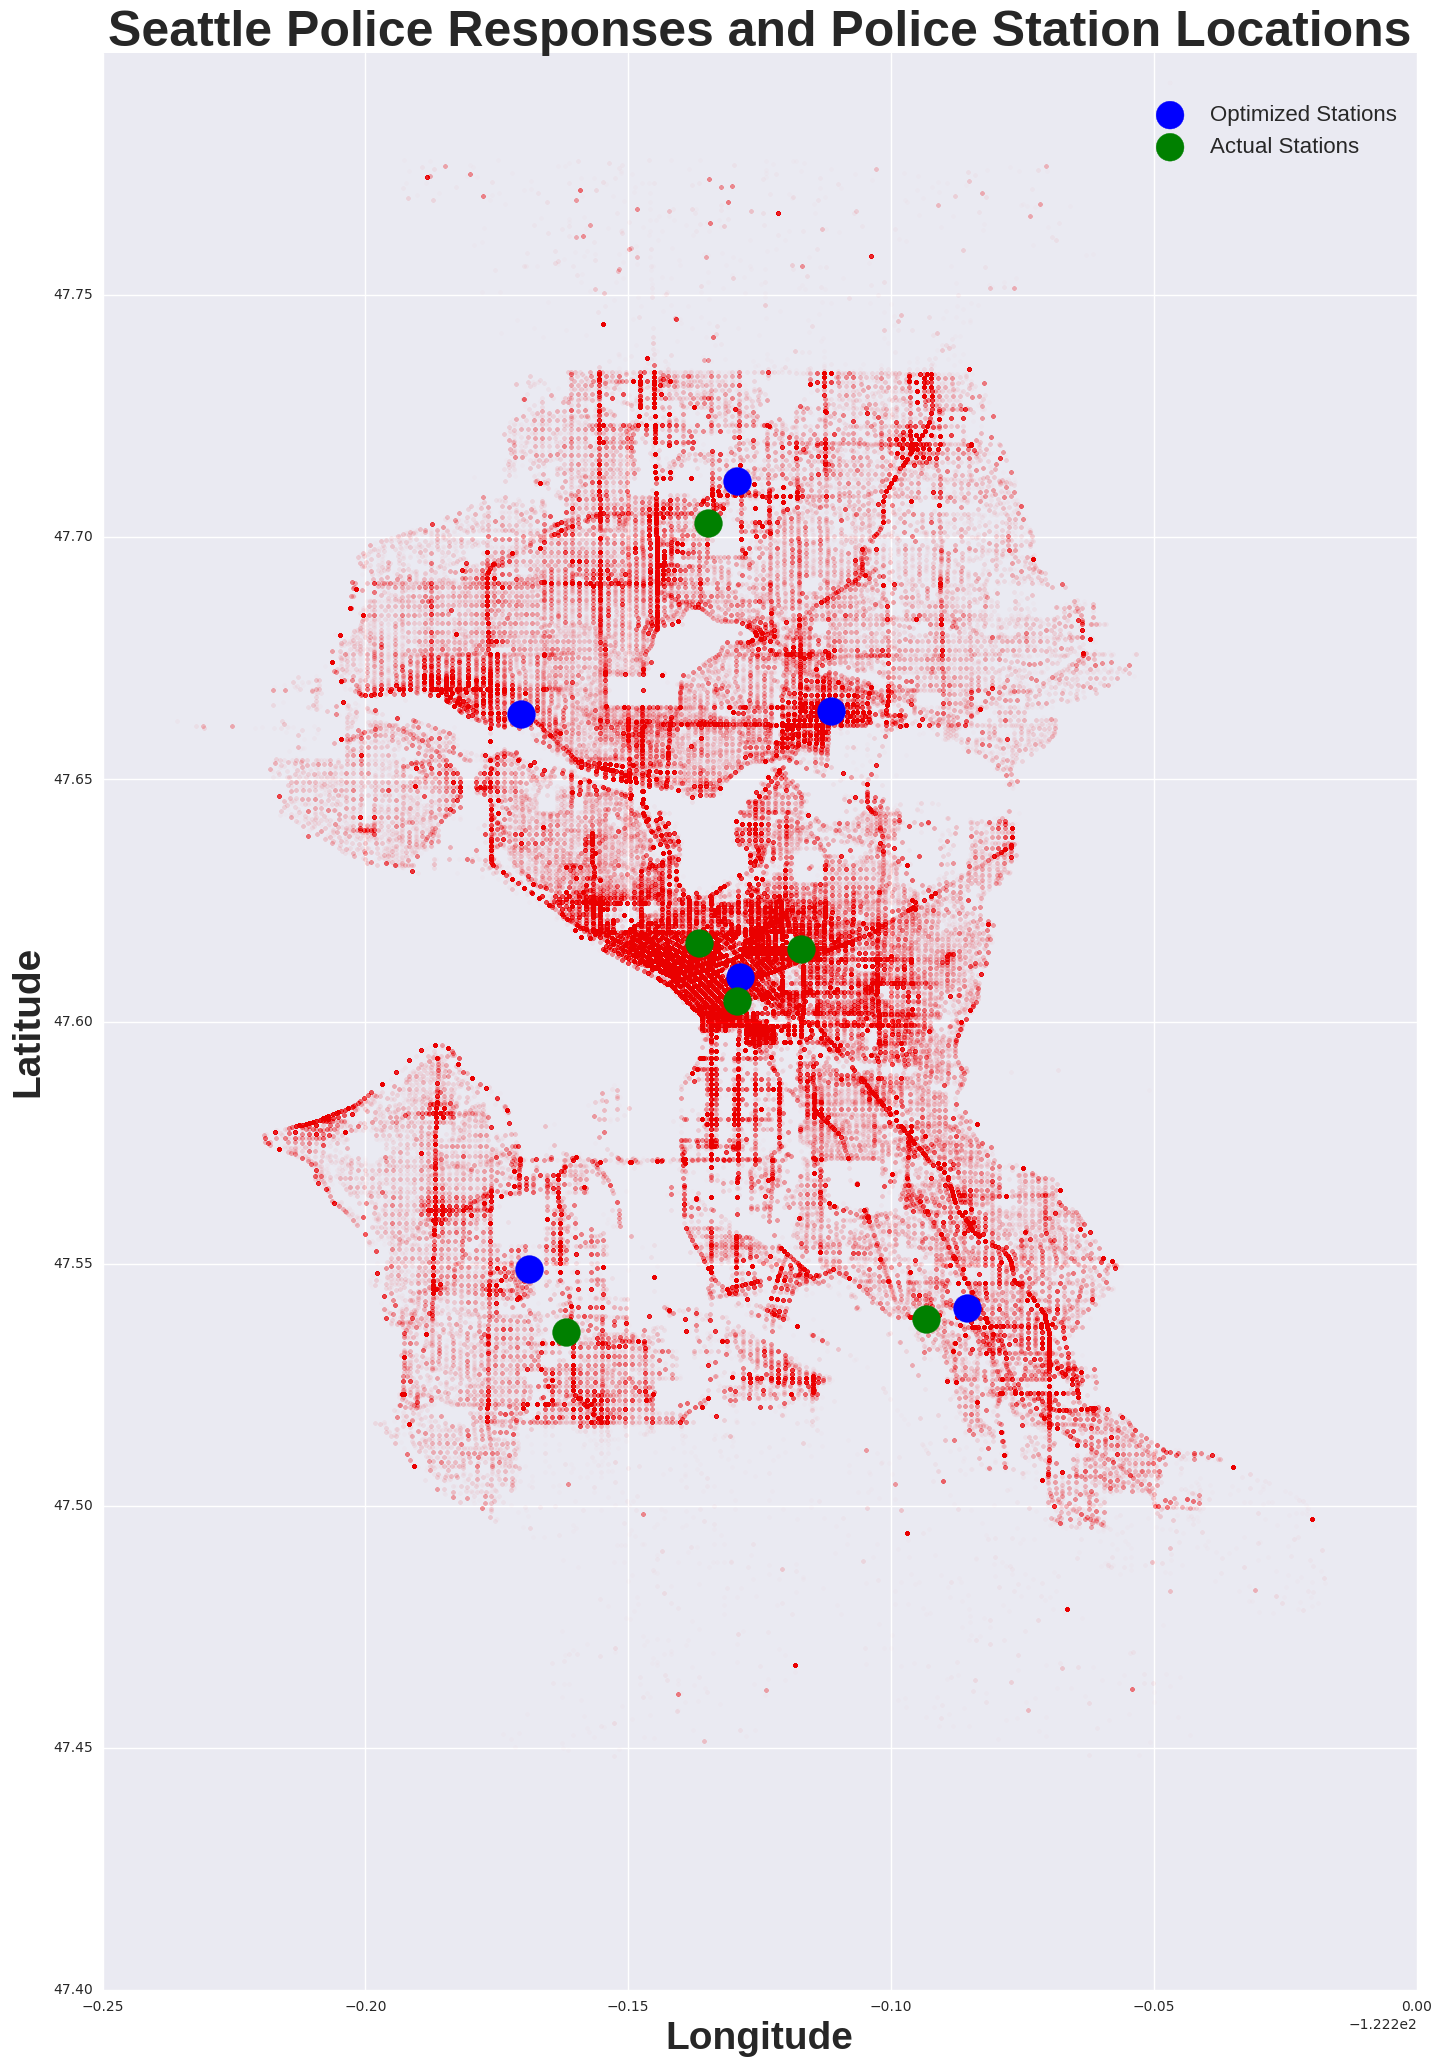

In [85]:
# Plot locations of police responses, actual SPD loc and optimal SPD loc
plt.figure(figsize=(16.96,25))
plt.scatter(X.Longitude, X.Latitude, alpha=0.01, s=10, color='r')
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=400, color='b')
plt.scatter(actual_df.Longitude, actual_df.Latitude, s=400, color='g')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle Police Responses and Police Station Locations', fontsize=36, fontweight='bold')
plt.legend(['', 'Optimized Stations', 'Actual Stations'], fontsize=16)
plt.savefig('pd_locations.png')